After cleaning the dataset of each species and removing the duplicate measurements for the same trait in the same observation, I now perform again the observation of the different plant growth forms for each species, to see what comes out.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [3]:
with open('./support_files/trait_id_list.txt', 'r') as openfile:
    trait_ids = openfile.read().splitlines()

print(f"There are {len(trait_ids)} traits in total\n")

#mapping them to int because they were read as strings
trait_ids = list(map(lambda x : int(x), trait_ids))

There are 16 traits in total



In [4]:
#specifing encoding='latin' is necessary or you get an error
dac_glo_cleaned_df = pd.read_csv('./support_files/dac_glo_cleaned_df.txt', sep='\t', encoding='latin')
ach_mil_cleaned_df = pd.read_csv('./support_files/ach_mil_cleaned_df.txt', sep='\t', encoding='latin')
tri_pra_cleaned_df = pd.read_csv('./support_files/tri_pra_cleaned_df.txt', sep='\t', encoding='latin')


In [6]:
dac_glo_cleaned_df.head()

,Unnamed: 0,AccSpeciesName,ObservationID,TraitID,TraitName,DataName,StdValue,UnitName
0,9,Dactylis glomerata,19150,13,Leaf carbon (C) content per leaf dry mass,Leaf carbon content per dry mass,458.5,mg/g
1,15,Dactylis glomerata,19194,13,Leaf carbon (C) content per leaf dry mass,Leaf carbon content per dry mass,416.2,mg/g
2,20,Dactylis glomerata,19216,14,Leaf nitrogen (N) content per leaf dry mass,Leaf nitrogen content per dry mass (Nmass),27.8,mg/g
3,29,Dactylis glomerata,19514,14,Leaf nitrogen (N) content per leaf dry mass,Leaf nitrogen content per dry mass (Nmass),15.91335,mg/g
4,28,Dactylis glomerata,19514,42,Plant growth form,Plant growth form,Herbaceous Monocot,NaN


Total number of PGFs:  26


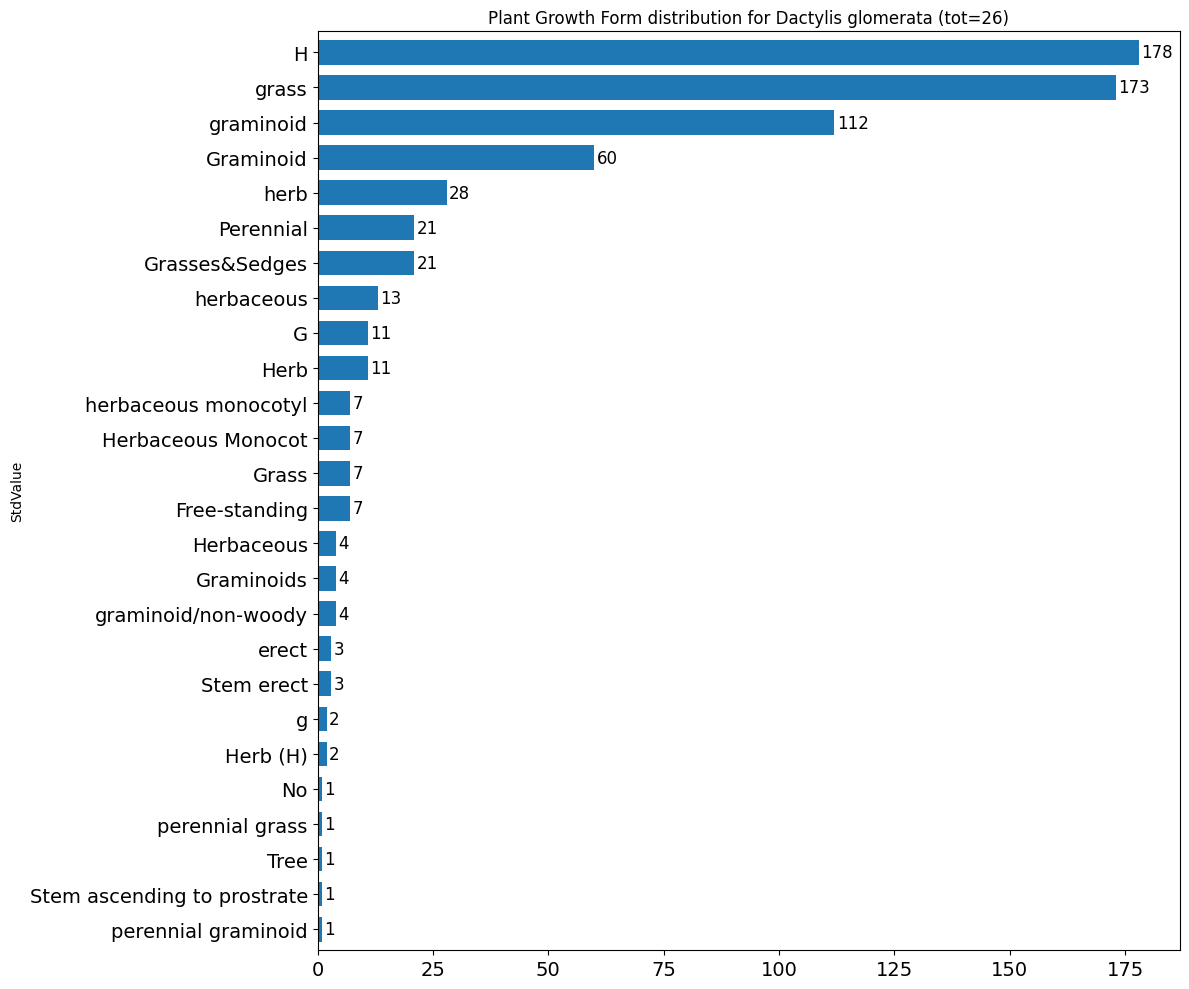

In [15]:
#find unique values of plant growth form for each species

dac_glo_growth_forms_COUNT = dac_glo_cleaned_df[dac_glo_cleaned_df['TraitID'] == 42]['StdValue'].value_counts()

print("Total number of PGFs: ", len(dac_glo_growth_forms_COUNT))

# print(dac_glo_growth_forms_COUNT)

fig, ax = plt.subplots(figsize=(12, 10))  # Increase figure size to avoid overlap


dac_glo_growth_forms_COUNT.sort_values().plot(kind='barh', 
                                              ax=ax,
                                              width= 0.7,
                                              title=f'Plant Growth Form distribution for Dactylis glomerata (tot={len(dac_glo_growth_forms_COUNT)})', 
                                              fontsize=14)
#very weird values in here, like 0.96 and 1

# Add values next to bars
for i, v in enumerate(dac_glo_growth_forms_COUNT.sort_values()):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=12)

# Optional: Adjust layout to fit everything
plt.tight_layout()

plt.show()
fig.savefig('./img/Dactylis_glomerata_plant_growth_forms_after_cleaning.pdf', bbox_inches="tight")


Total number of PGFs:  23


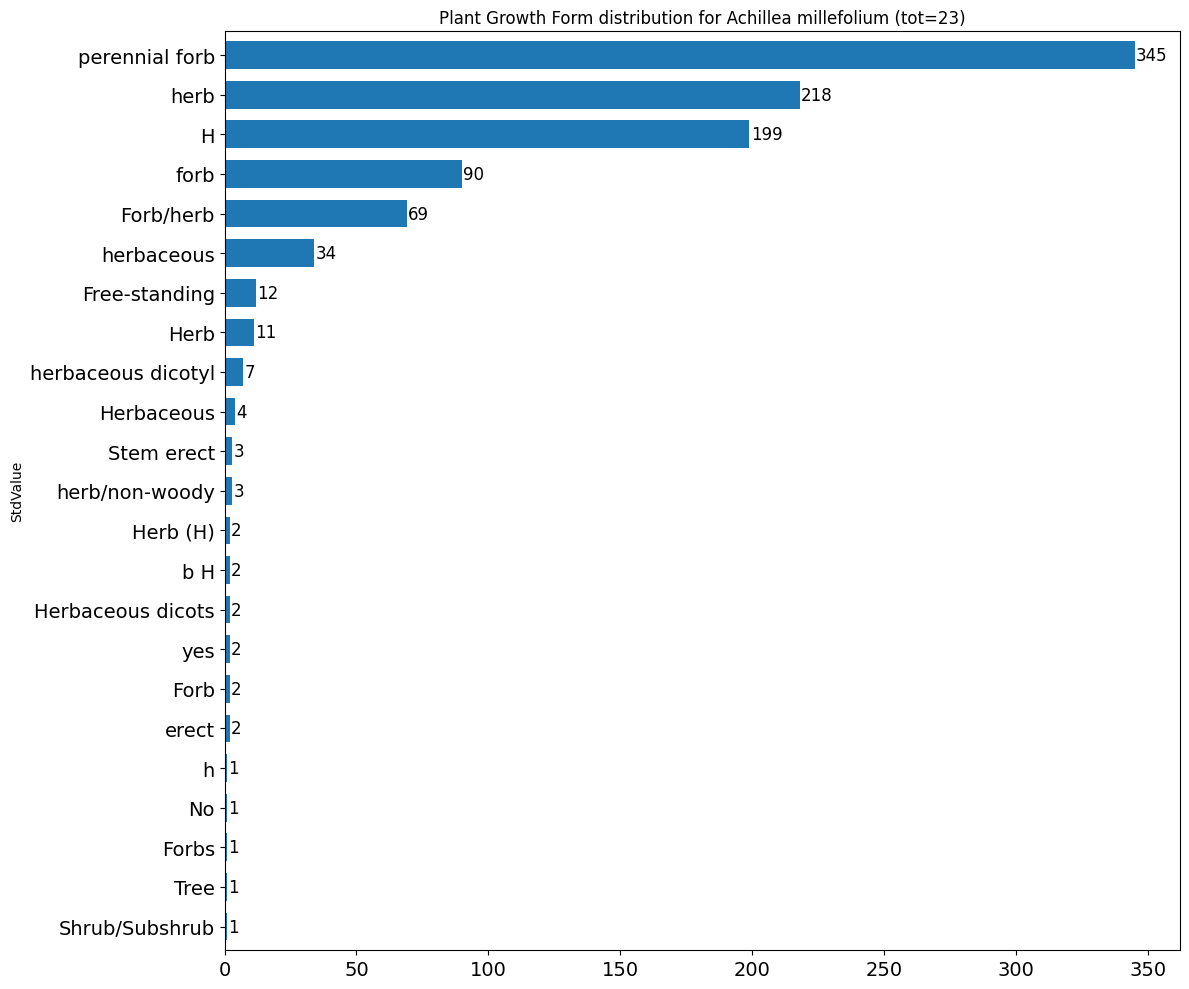

In [16]:
#find unique values of plant growth form for each species

ach_mil_growth_forms_COUNT = ach_mil_cleaned_df[ach_mil_cleaned_df['TraitID'] == 42]['StdValue'].value_counts()

print("Total number of PGFs: ", len(ach_mil_growth_forms_COUNT))

# print(dac_glo_growth_forms_COUNT)

fig, ax = plt.subplots(figsize=(12, 10))  # Increase figure size to avoid overlap


ach_mil_growth_forms_COUNT.sort_values().plot(kind='barh', 
                                              ax=ax,
                                              width= 0.7,
                                              title=f'Plant Growth Form distribution for Achillea millefolium (tot={len(ach_mil_growth_forms_COUNT)})', 
                                              fontsize=14)
#very weird values in here, like 0.96 and 1

# Add values next to bars
for i, v in enumerate(ach_mil_growth_forms_COUNT.sort_values()):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=12)

# Optional: Adjust layout to fit everything
plt.tight_layout()

plt.show()
fig.savefig('./img/Achillea_millefolium_plant_growth_forms_after_cleaning.pdf', bbox_inches="tight")

Total number of PGFs:  26


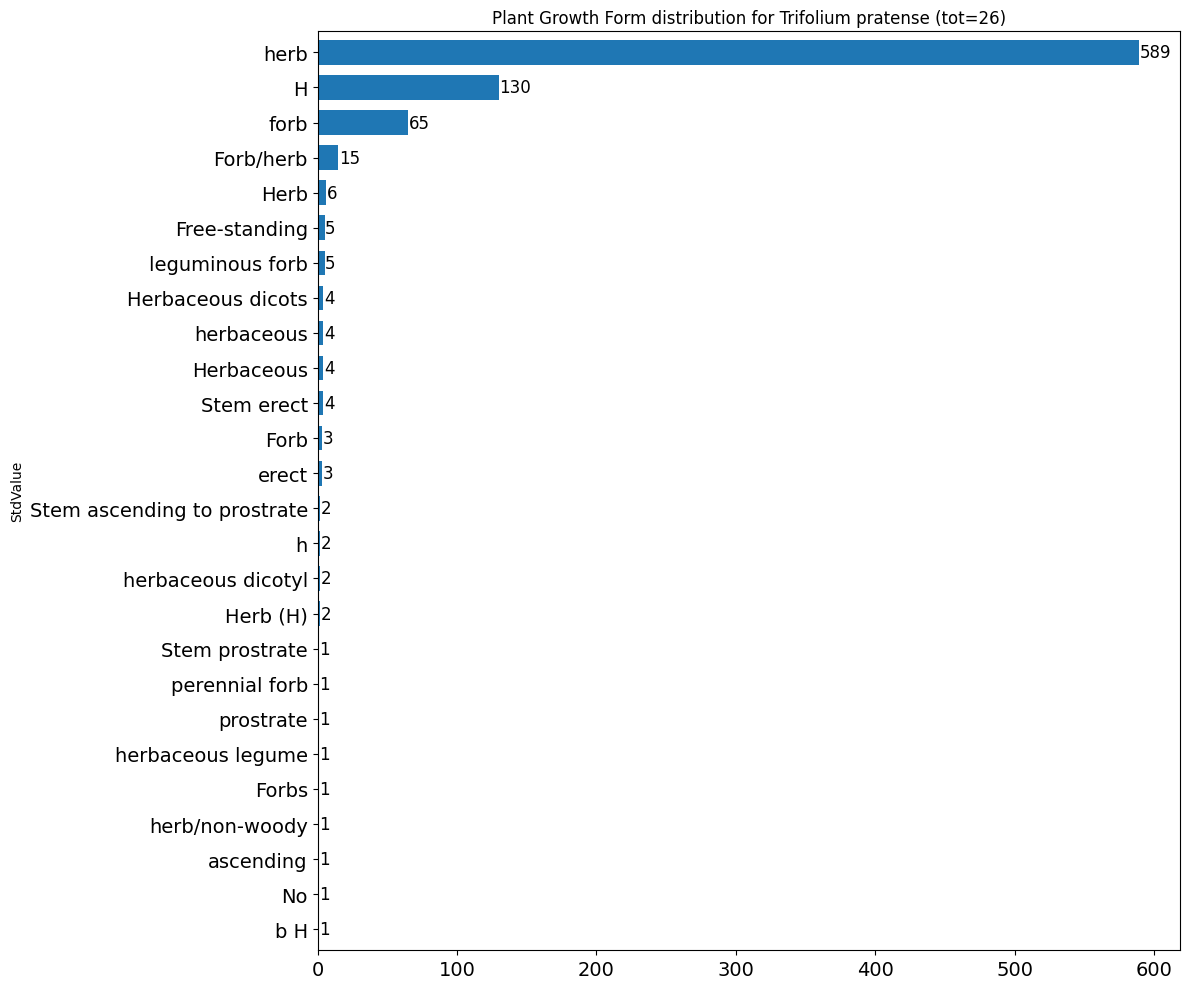

In [17]:
#find unique values of plant growth form for each species

tri_pra_growth_forms_COUNT = tri_pra_cleaned_df[tri_pra_cleaned_df['TraitID'] == 42]['StdValue'].value_counts()

print("Total number of PGFs: ", len(tri_pra_growth_forms_COUNT))

# print(dac_glo_growth_forms_COUNT)

fig, ax = plt.subplots(figsize=(12, 10))  # Increase figure size to avoid overlap


tri_pra_growth_forms_COUNT.sort_values().plot(kind='barh', 
                                              ax=ax,
                                              width= 0.7,
                                              title=f'Plant Growth Form distribution for Trifolium pratense (tot={len(tri_pra_growth_forms_COUNT)})', 
                                              fontsize=14)
#very weird values in here, like 0.96 and 1

# Add values next to bars
for i, v in enumerate(tri_pra_growth_forms_COUNT.sort_values()):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=12)

# Optional: Adjust layout to fit everything
plt.tight_layout()

plt.show()
fig.savefig('./img/Trifolium_pratense_plant_growth_forms_after_cleaning.pdf', bbox_inches="tight")